# Make correlation plots over time

The present notebook again plots volume-wise correlations. Unlike the preceding notebook, this is now done on a group level, which also means that we have multiple observations for each volume and can include a measure of uncertainty into our plots.

### import modules

In [191]:
import os
import pickle

import numpy as np
import pandas as pd

from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('poster')
sns.set_style('ticks')

In [192]:
# after converstion to .py, we can use __file__ to get the module folder
try:
    thisDir = os.path.realpath(__file__)
# in notebook form, we take the current working directory (we need to be in 'notebooks/' for this!)
except:
    thisDir = '.'
# convert relative path into absolute path, so this will work with notebooks and py modules
supDir = os.path.abspath(os.path.join(os.path.dirname(thisDir), '..'))

supDir

'/data/martin/volume-wise-repo'

### get meta df

We need this e.g. to get information about conclusiveness

In [193]:
data_df = pd.read_csv(
    '../data/processed/csv/info_epi_zscored_zdiff_summarymaps_2dpredclean_corr_counts_df.csv',
    index_col=[0, 1],
    header=0)

In [ ]:
data_df.tail()

#### conclusiveness filters

In [195]:
is_conclusive = data_df.loc[:, 'pred'] != 'inconclusive'

In [196]:
is_conclusive.sum()

63

### get data

In [197]:
def make_group_df(data_df,metric='corr_df'):
    '''load correlation data of all patients'''
    
    group_df = pd.DataFrame()
    
    for p in data_df.index:
        # get data
        filename = data_df.loc[p, metric]
        this_df = pd.read_csv(filename, index_col=[0], header=0)
        # add patient infos to index
        this_df.index = pd.MultiIndex.from_tuples([p])
        
        group_df = pd.concat([group_df, this_df])

    # reorder the colums and make sure volumes are integer values
    group_df.columns = group_df.columns.astype(int)

    # sort across rows, then across columns, to make sure that volumes
    # are in the right order
    group_df = group_df.sort_index(axis=0)
    group_df = group_df.sort_index(axis=1)

    # check if everything is in its right place
    assert all(group_df.columns == range(200)), 'wrong order of volumes'
            
    return group_df

In [198]:
group_df = make_group_df(data_df)

In [ ]:
group_df.tail()

#### filter data

In [200]:
# only conclusive cases
conclusive_df = group_df[is_conclusive]
# only inconclusive cases
inconclusive_df = group_df[is_conclusive == False]
# all cases unfiltered
withinconclusive_df = group_df.copy()

In [201]:
print(conclusive_df.shape, inconclusive_df.shape, withinconclusive_df.shape)

(63, 200) (33, 200) (96, 200)


### get design

In [202]:
conds_file = os.path.join(supDir,'models','conds.p')
with open(conds_file, 'rb') as f:
    conds = pickle.load(f)

In [203]:
print(conds)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1]


### get colors

In [204]:
colors_file = os.path.join(supDir,'models','colors.p')
with open(colors_file, 'rb') as f:
    color_dict = pickle.load(f)

In [205]:
my_cols = {}
for i, j in zip(['red', 'blue', 'yellow'], ['left', 'right', 'bilateral']):
    my_cols[j] = color_dict[i]

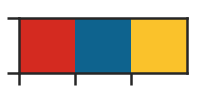

In [206]:
sns.palplot([my_cols[k] for k in my_cols])

In [207]:
conclusive_df.groupby(level=0).mean()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
bilateral,0.021715,0.023933,-0.011515,0.001521,0.022991,0.002382,0.013120,0.031086,-0.001035,0.011563,...,-0.028357,0.003402,0.030938,0.033994,0.008315,0.017174,0.040205,0.047587,0.028363,0.004898
left,-0.027065,-0.039559,-0.026577,-0.023188,-0.023928,-0.015691,-0.023613,-0.006042,0.000230,-0.020782,...,-0.027834,-0.010935,0.020963,0.058919,0.067644,0.061016,0.048569,0.042859,0.058409,0.051456
right,0.027780,0.022329,0.038333,0.011687,-0.016722,-0.024898,0.026540,0.016073,0.013430,0.007185,...,0.010161,0.031717,-0.035864,-0.010856,-0.012602,-0.000792,-0.006123,-0.007022,-0.010038,-0.018887


### plot corrs

In [208]:
conclusive_df.groupby(level=0).count()[0].loc['bilateral']

10

In [209]:
conclusive_df.groupby(level=0).std()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
bilateral,0.054273,0.031407,0.065855,0.075703,0.073059,0.057916,0.047730,0.069998,0.062769,0.069006,...,0.050836,0.064513,0.080826,0.060427,0.071759,0.054290,0.058485,0.054569,0.066132,0.048600
left,0.072689,0.073094,0.073671,0.064172,0.062031,0.079994,0.072507,0.070149,0.063577,0.072377,...,0.079896,0.059275,0.078700,0.077263,0.062844,0.089117,0.087110,0.094739,0.079967,0.085727
right,0.110815,0.097716,0.079912,0.095490,0.101970,0.108065,0.112104,0.111059,0.115702,0.117109,...,0.089784,0.079007,0.060297,0.049727,0.053971,0.078892,0.056630,0.072631,0.088778,0.087837


In [210]:
def make_plot(df, ax, my_cols=my_cols, color_dict=color_dict):
    '''group-levels volume-wise correlations, with mean and confidence interval'''

    # find the volumes when activity starts (cave: blocks have to be 10
    # volume long, as is hard-coded herewith
    act_blocks = np.where(np.array(conds) == 1)[-1][::10]

    # draw each block with height -1 to +1 (needs to be trimmed to actual
    # data range later, otherwise too large)
    for i in act_blocks:
        ax.fill_between([i, i + 10], [-1, -1], [1, 1],
                        color=color_dict['trans'],
                        alpha=0.7)

    mean_df = df.groupby(level=0).mean()

    std_df = df.groupby(level=0).std()
    n_df = df.groupby(level=0).count()[0]
    
    for c in mean_df.index:
        
        this_mean = mean_df.loc[c,:]
        this_std = std_df.loc[c,:]
        this_n = n_df.loc[c]
        this_se = this_std/np.sqrt(this_n)
        
        #try:
        ax.plot(this_mean, '-',color=my_cols[c], label=c, alpha=0.7, linewidth=4)

        ax.fill_between(
                this_std.index,
                this_mean - this_se,
                this_mean + this_se,
                color=my_cols[c],
                alpha=0.3)
        #except:
            #ax.plot(this_mean, '-',color=color_dict['black'], alpha=0.7, linewidth=4)
    
    # dotted line indicates zero/no correlation
    ax.axhline(0, linestyle=':', color=color_dict['black'], linewidth=3)

    ax.set_xlim(0, 200)
    ax.set_xticks(np.arange(0, 201, 20))

    ax.set_ylim(-0.1,0.1)
    #ax.legend(loc='best', fontsize=20)

    ax.set_xlabel('volume')
    ax.set_ylabel('correlation')

    sns.despine(trim=True, offset=10)

    return ax

In [211]:
my_labels = ['left', 'bilateral', 'right']

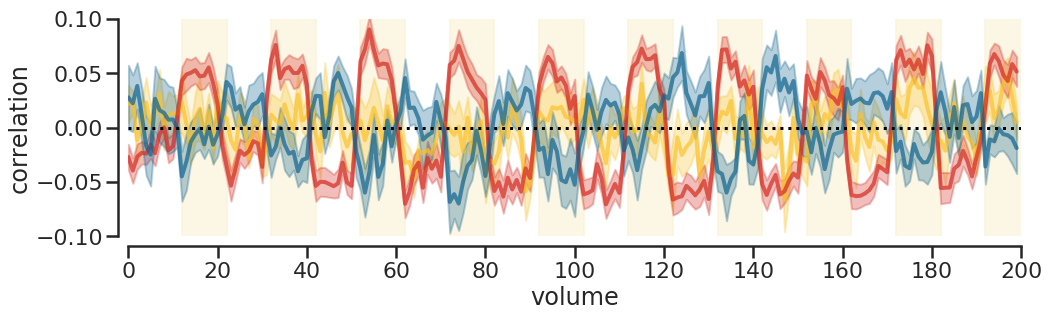

In [212]:
fig = plt.figure(figsize=(16, 4))

ax = plt.subplot(111)
ax = make_plot(conclusive_df, ax)

#plt.legend(loc=(1,0.7))
plt.savefig('../reports/figures/12-timecourse200.png',dpi=300,bbox_inches='tight')
plt.show()

#### Double-Check: Do the same thing using another implementation

This version computes bootstrap CIs using seaborn.Here we use 68% CIs as the equivalent of one SE.

/data/condaEnvs/volumeAnalysis/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


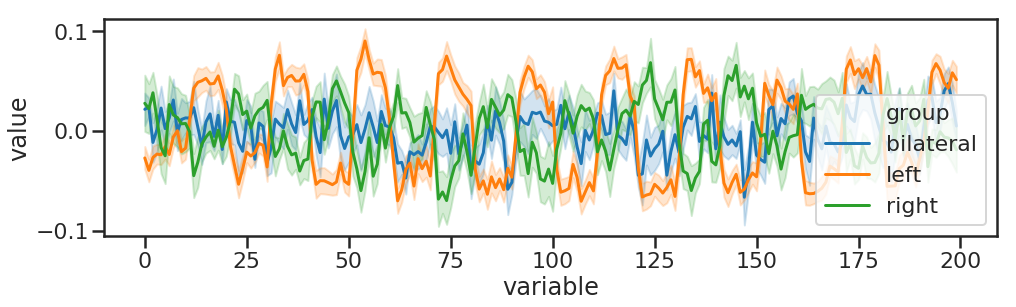

In [213]:
check_conclusive_df = conclusive_df.copy()
check_conclusive_df.loc[:,'group'] = check_conclusive_df.index.get_level_values(0)
check_conclusive_df.loc[:,'id'] = check_conclusive_df.index.get_level_values(1)

check_conclusive_df = check_conclusive_df.melt(id_vars=['group','id'])

fig,ax = plt.subplots(1,1,figsize=(16,4))
sns.lineplot(x="variable", y="value",
             hue="group",ci=68, n_boot=100000,
             data=check_conclusive_df,ax=ax)
plt.show()

### for inconclusive cases

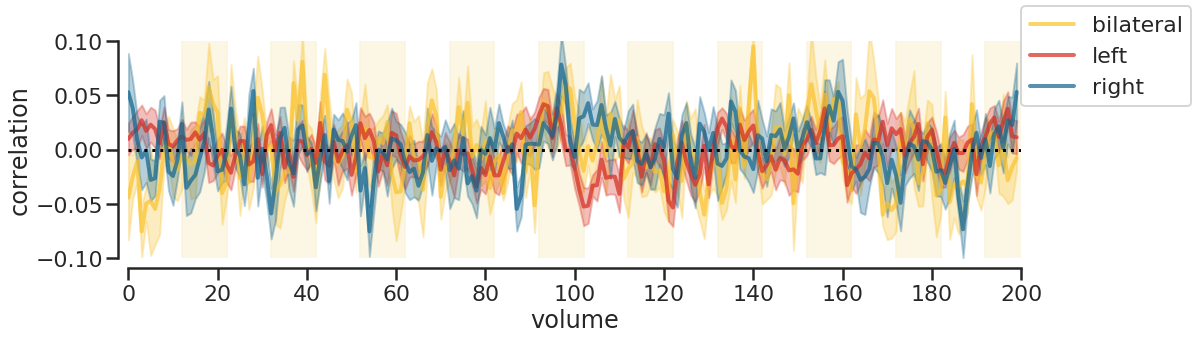

In [214]:
fig = plt.figure(figsize=(16,4))

ax = plt.subplot(111)
ax = make_plot(inconclusive_df, ax)

plt.legend(loc=(1,0.7))
plt.show()

### average over one cycle

#### design for a 20-TR cycle

In [215]:
trs = np.concatenate([np.array([-999,-999]), np.array(list(range(0,20)) * 10)])[:200]

In [216]:
print(trs)

[-999 -999    0    1    2    3    4    5    6    7    8    9   10   11
   12   13   14   15   16   17   18   19    0    1    2    3    4    5
    6    7    8    9   10   11   12   13   14   15   16   17   18   19
    0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19    0    1    2    3    4    5    6    7
    8    9   10   11   12   13   14   15   16   17   18   19    0    1
    2    3    4    5    6    7    8    9   10   11   12   13   14   15
   16   17   18   19    0    1    2    3    4    5    6    7    8    9
   10   11   12   13   14   15   16   17   18   19    0    1    2    3
    4    5    6    7    8    9   10   11   12   13   14   15   16   17
   18   19    0    1    2    3    4    5    6    7    8    9   10   11
   12   13   14   15   16   17   18   19    0    1    2    3    4    5
    6    7    8    9   10   11   12   13   14   15   16   17   18   19
    0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14 

In [217]:
def make_tr_plot(df, trs=trs, my_cols=my_cols, color_dict=color_dict,ax=ax):
    '''make group-level volume-wise plot with mean and CI, but averaged across one
    cycle of rest and activity
    '''
    
    ax.fill_between([9.5, 9.5 + 10], [-1, -1], [1, 1],
                    color=color_dict['trans'],
                    alpha=0.7)
    
    ax.axhline(0, linewidth=3, linestyle=':', c='k')
        
    for i, g in enumerate(['left', 'bilateral', 'right']):

            this_df = df.loc[g,:].T

            # the two volumes are before the experiment started so to speak
            # because of the HRF-delay,so we drop them
            this_df = this_df.iloc[2:, :]
            this_df.index = [trs[2:], this_df.index]

            this_tr_df = this_df.groupby(level=0).mean().T

            x = this_tr_df.columns
            y = this_tr_df.mean()
            y_std = this_tr_df.std()
            n = this_tr_df.shape[0]

            y_se = y_std / np.sqrt(n)
            y_ci = y_se * 1.96

            ax.plot(x, y, '-o', c=my_cols[g], label=g)
            ax.fill_between(
                x, y - y_ci, y + y_ci, alpha=0.4, color=my_cols[g])

    ax.set_xlabel('volume')
    ax.set_ylabel('correlation')

    ax.set_xlim(-0.5, 19.5)
    ax.set_xticks(np.arange(0, 21, 2))
    ax.set_xticklabels(np.arange(2, 23, 2))

    ax.set_ylim(-0.1,0.1)

    sns.despine(trim=True,offset=5)

    ax.legend(loc='best')

    return ax

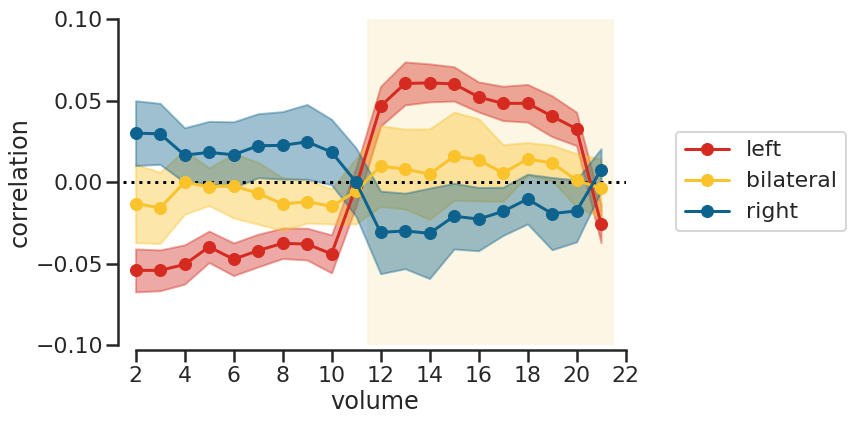

In [218]:
fig = plt.figure(figsize=(9,6))

ax = plt.subplot(111)
ax = make_tr_plot(conclusive_df,ax=ax)

plt.legend(loc=(1.1,0.35))
plt.savefig('../reports/figures/12-timecourse20.png',dpi=300,bbox_inches='tight')
plt.show()

#### Double-Check: Do the same thing using another implementation

This version computes bootstrap CIs using seaborn. 

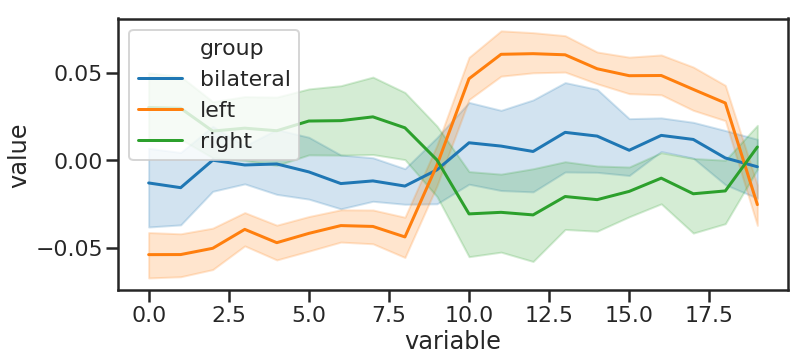

In [219]:
check_conclusive_df = conclusive_df.copy()
check_conclusive_df.columns = trs
check_conclusive_df = check_conclusive_df.groupby(level=0,axis=1).mean().drop(-999,axis=1)
check_conclusive_df.loc[:,'group'] = check_conclusive_df.index.get_level_values(0)
check_conclusive_df.loc[:,'id'] = check_conclusive_df.index.get_level_values(1)

check_conclusive_df = check_conclusive_df.melt(id_vars=['group','id'])

fig,ax = plt.subplots(1,1,figsize=(12,5))
sns.lineplot(x="variable", y="value",
             hue="group",ci=95, n_boot=100000,
             data=check_conclusive_df,ax=ax)
plt.show()

### combine

In [220]:
sns.set_style('dark')

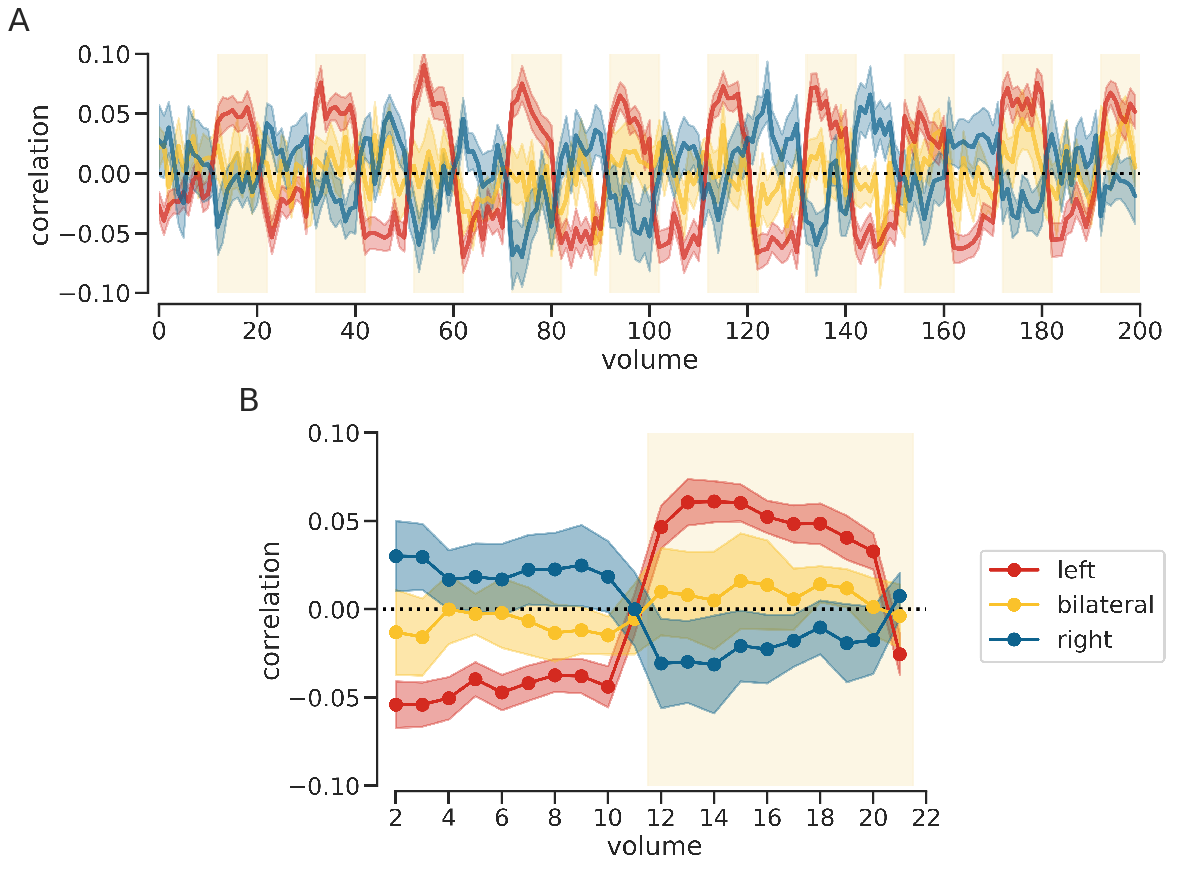

In [221]:
fig = plt.figure(figsize=(16, 12))

ax1 = fig.add_axes([0,1,1,1], xticklabels=[], yticklabels=[])
ax1.imshow(Image.open('../reports/figures/12-timecourse200.png'))

ax2 = fig.add_axes([0.2,0.5,.8,1], xticklabels=[], yticklabels=[])
ax2.imshow(Image.open('../reports/figures/12-timecourse20.png'))

plt.text(-0.01,1.02, 'A',transform=ax1.transAxes, fontsize=32)
plt.text(0.19,-0.08, 'B',transform=ax1.transAxes, fontsize=32)

plt.savefig('../reports/figures/12-all-timecourses.png',dpi=300,bbox_inches='tight')
plt.show()

In [222]:
sns.set_style('ticks')

### show the correlations when rest is inverted

In [223]:
inv_df = conclusive_df*conds

In [ ]:
inv_df.tail()

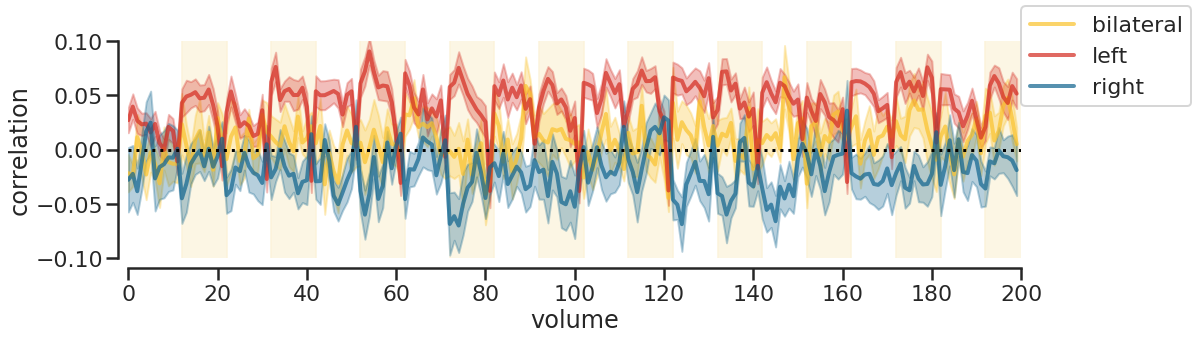

In [225]:
fig = plt.figure(figsize=(16, 4))

ax = plt.subplot(111)
ax = make_plot(inv_df, ax)

plt.legend(loc=(1,0.7))
plt.show()

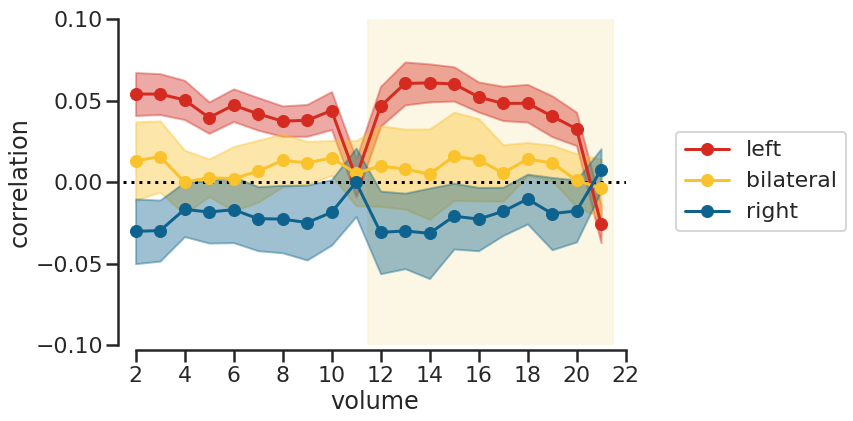

In [226]:
fig = plt.figure(figsize=(9,6))

ax = plt.subplot(111)
ax = make_tr_plot(inv_df,ax=ax)

plt.legend(loc=(1.1,0.35))
plt.show()

## For individual patients

### get data

In [227]:
p_name = 'pat#'

In [ ]:
p_df = pd.read_csv('../data/interim/csv/%s_corr_df.csv'%p_name,index_col=[0],header=0)
p_df

In [ ]:
p_inv_df = p_df*conds
p_inv_df

### get classifier

In [230]:
clf_file = os.path.join(supDir,'models','volume_clf.p')
with open(clf_file,'rb') as f:
    d = pickle.load(f)

In [231]:
clf = d['clf']
my_scaler = d['scaler']
my_labeler = d['labeler']

### predict label of each volume

In [232]:
def make_preds(this_df,clf,my_scaler,my_labeler):
    
    scaled_features = my_scaler.transform(this_df.T)
    predictions = clf.predict(scaled_features)
    labeled_predictions = my_labeler.inverse_transform(predictions)
    
    return labeled_predictions

In [233]:
labeled_predictions = make_preds(p_inv_df,clf,my_scaler,my_labeler)

/data/condaEnvs/volumeAnalysis/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### plot results

In [234]:
def make_single_plot(p_df,predictions, ax, my_cols=my_cols, color_dict=color_dict):
    '''group-levels volume-wise correlations, with mean and confidence interval'''

    # find the volumes when activity starts (cave: blocks have to be 10
    # volume long, as is hard-coded herewith
    act_blocks = np.where(np.array(conds) == 1)[-1][::10]

    # draw each block with height -1 to +1 (needs to be trimmed to actual
    # data range later, otherwise too large)
    for i in act_blocks:
        ax.fill_between([i, i + 10], [-1, -1], [1, 1],
                        color=color_dict['trans'],
                        alpha=0.7)

    y_vals = p_df.values[-1]
    ax.plot(y_vals, '-',color=color_dict['black'], linewidth=2)
    
    for x_val,y_val,y_pred in zip(p_df.columns,y_vals,predictions):
        ax.plot(x_val,y_val,'o',color=my_cols[y_pred],markersize=9)
    
    # dotted line indicates zero/no correlation
    ax.axhline(0, linestyle=':', color=color_dict['black'], linewidth=3)
    
    ax.set_xlim(0, 200)
    ax.set_xticks(np.arange(0, 201, 20))
    ax.set_xticklabels(np.arange(0, 201, 20))

    my_max = abs(y_vals).max()
    ax.set_ylim(-my_max*1.1,+my_max*1.1)

    ax.set_xlabel('volume')
    ax.set_ylabel('correlation')

    sns.despine(trim=True, offset=10)

    return ax

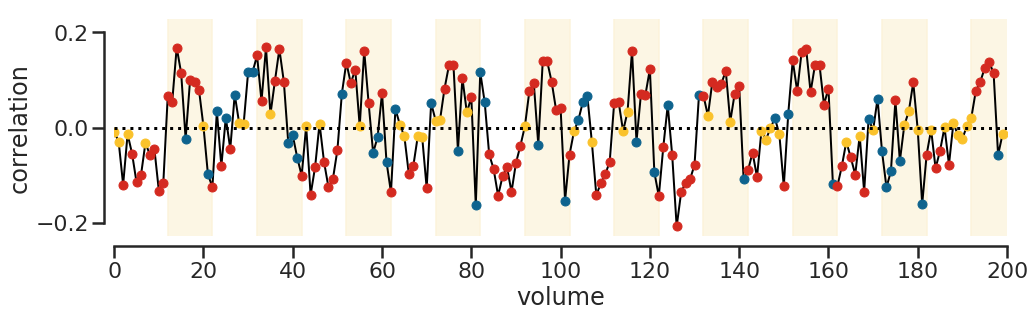

In [235]:
fig,ax = plt.subplots(1,1,figsize=(16,4))
ax = make_single_plot(p_df,labeled_predictions,ax=ax)
sns.despine()
plt.savefig('../examples/%s_timeAll200trs.png'%p_name,dpi=300,bbox_inches='tight')
plt.show()

In [236]:
def make_single_tr_plot(df, ax, trs=trs, my_cols=my_cols, color_dict=color_dict):
    
    ax.fill_between([9.5, 9.5 + 10], [-1, -1], [1, 1],
                    color=color_dict['trans'],
                    alpha=0.7)
    
    ax.axhline(0, linewidth=3, linestyle=':', c='k')

    this_df = df.copy().T

    # the two volumes are before the experiment started so to speak
    # because of the HRF-delay,so we drop them
    this_df = this_df.iloc[2:, :]
    this_df.index = [trs[2:], this_df.index]

    # make spaghetti plot
    copy_df = this_df.copy()
    bins = np.array([[x]*20 for x in range(10)]).ravel()[:198]
    copy_df.index = [bins,copy_df.index.get_level_values(0)]
    for b in copy_df.index.levels[0]:
        ax.plot(copy_df.loc[b],color='grey',alpha=0.5)
    
    # make area plot
    this_tr_mean = this_df.groupby(level=0).mean()
    this_tr_std = this_df.groupby(level=0).std()
    ax.plot(this_tr_mean.index,this_tr_mean.values, '-', c=color_dict['black'])
    
    this_inv_df = (df*conds).copy().T
    this_inv_df = this_inv_df.iloc[2:, :]
    this_inv_df.index = [trs[2:], this_inv_df.index]
    this_inv_tr_mean = this_inv_df.groupby(level=0).mean().T.values
    labeled_predictions = make_preds(this_inv_tr_mean,clf,my_scaler,my_labeler)

    for x_val,y_val,y_pred in zip(this_tr_mean.index,this_tr_mean.values,labeled_predictions):
        plt.plot(x_val,y_val,'o',color=my_cols[y_pred],markersize=12)
    
    lower_std_bound = (this_tr_mean - this_tr_std).T.values[-1]
    upper_std_bound = (this_tr_mean + this_tr_std).T.values[-1]
    
    ax.fill_between(
        this_tr_mean.index,
        lower_std_bound,
        upper_std_bound,
        alpha=0.1, 
        color=color_dict['black'])

    ax.set_xlabel('volume')
    ax.set_ylabel('correlation')

    ax.set_xlim(-0.5, 19.5)
    ax.set_xticks(np.arange(0, 21, 2))
    ax.set_xticklabels(np.arange(2, 23, 2))
    
    ax.set_ylim(lower_std_bound.min()*1.4,upper_std_bound.max()*1.4)
    sns.despine(trim=True, offset=10)

    return ax

#### Check: does this behave as expected?

Create fake data which show a linear increase with block and with TR.  

In each block, the data increase by one, with every 20-TR cycle, the data increase by one as well.

In [237]:
test_data = trs + np.concatenate([np.array([-999,-999]),np.array([[x]*20 for x in range(10)]).ravel()])[:200]

In [238]:
test_data

array([-1998, -1998,     0,     1,     2,     3,     4,     5,     6,
           7,     8,     9,    10,    11,    12,    13,    14,    15,
          16,    17,    18,    19,     1,     2,     3,     4,     5,
           6,     7,     8,     9,    10,    11,    12,    13,    14,
          15,    16,    17,    18,    19,    20,     2,     3,     4,
           5,     6,     7,     8,     9,    10,    11,    12,    13,
          14,    15,    16,    17,    18,    19,    20,    21,     3,
           4,     5,     6,     7,     8,     9,    10,    11,    12,
          13,    14,    15,    16,    17,    18,    19,    20,    21,
          22,     4,     5,     6,     7,     8,     9,    10,    11,
          12,    13,    14,    15,    16,    17,    18,    19,    20,
          21,    22,    23,     5,     6,     7,     8,     9,    10,
          11,    12,    13,    14,    15,    16,    17,    18,    19,
          20,    21,    22,    23,    24,     6,     7,     8,     9,
          10,    11,

format this like the correlation df's of the patients

In [239]:
test_df = pd.DataFrame(test_data).T
test_df.index = ['template']

In [240]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
template,-1998,-1998,0,1,2,3,4,5,6,7,...,17,18,19,20,21,22,23,24,25,26


#### make a plot with the fake data

Here, we would expect that there are 10 lines in parallel in steps of one and that for each TR step their mean increases by one. This is true except for the last two TRs, because the last block ends prematurely (because of the two-TR shift in our model). But this is not a problem for our real data, as we do not expect that there is a linear effect of block.

Note that as all values are very high positive, the positive "correlations" during rest get classified as right and the positive values during task get classified as left, as would be expected.

/data/condaEnvs/volumeAnalysis/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


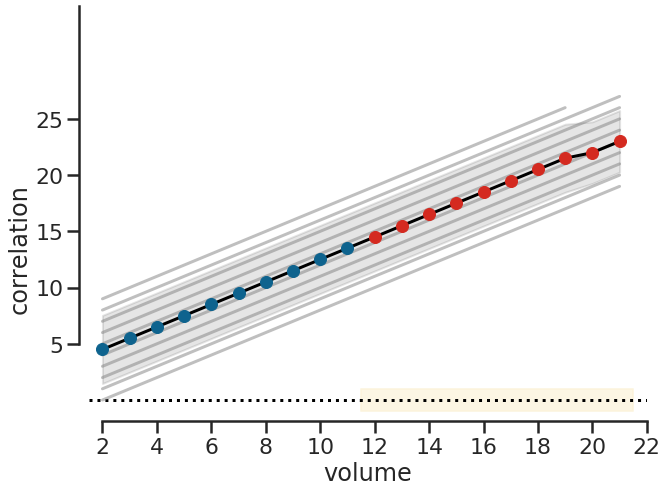

In [241]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
ax = make_single_tr_plot(test_df,ax)
ax.set_ylim(-1,28)
sns.despine()
plt.show()

/data/condaEnvs/volumeAnalysis/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


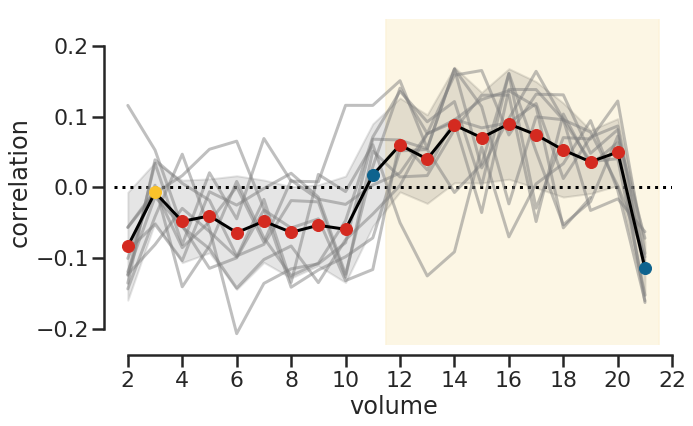

In [242]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
ax = make_single_tr_plot(p_df,ax)
sns.despine()
plt.savefig('../examples/%s_timeCycle20trs.png'%p_name,dpi=300,bbox_inches='tight')
plt.show()

#### Double-Check:

It seems that for the last volume, the drop is very uniform (rather, the values at volume 21 look more uniform than the other ones). Check with another method if this is really how the data look:

In [243]:
p_df.iloc[:,21::20]

,21,41,61,81,101,121,141,161,181
template,-0.098382,-0.062874,-0.072067,-0.163188,-0.15304,-0.093685,-0.108682,-0.118715,-0.160616


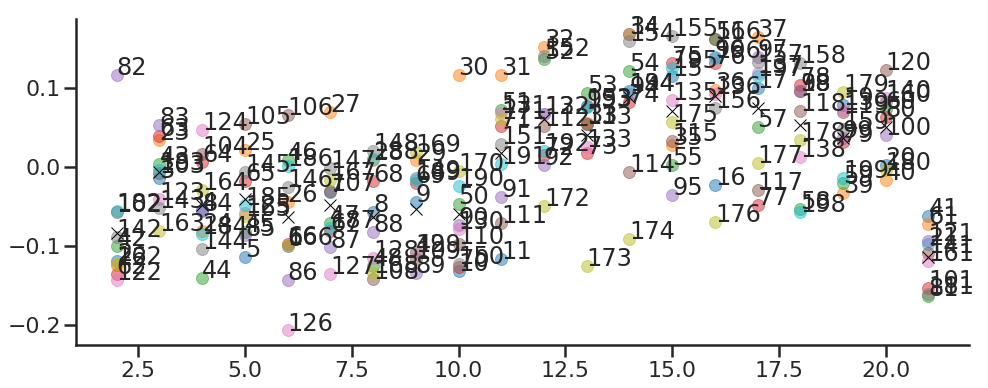

In [244]:
plt.figure(figsize=(16,6))
for x in range(2,22):
    # make a single plot every 20 volumes
    this_tr = p_df.iloc[:,x::20]
    
    plt.plot(x,this_tr,'o',alpha=0.5)
    plt.plot(x,this_tr.mean(axis=1),'x',alpha=1,color='k')
    for y in this_tr.columns:
        plt.annotate(xy=(x,this_tr.loc[:,y]),s=y)
sns.despine()
plt.show()

Data does look as expected as single points. It is rather that the moments when the curve is steep (e.g. at the end), it appears like the CIs are smaller when in fact they are not, they just align more with the steepness of the line plot. E.g. at the beginning, the distribution of data is very similar, so the last volume is not that different from the first, as we would expect.

### another patient, another plot

/data/condaEnvs/volumeAnalysis/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


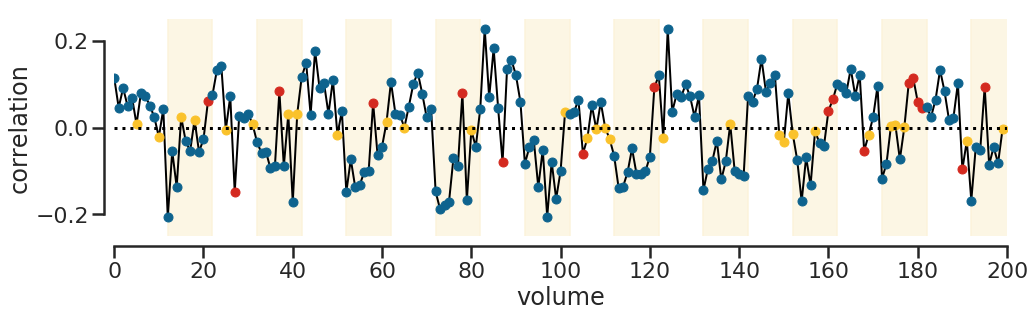

In [245]:
p_df = pd.read_csv('../data/interim/csv/pat###_corr_df.csv',index_col=[0],header=0)
p_inv_df = p_df*conds
labeled_predictions = make_preds(p_inv_df,clf,my_scaler,my_labeler)

fig,ax = plt.subplots(1,1,figsize=(16,4))
ax = make_single_plot(p_df,labeled_predictions,ax=ax)
sns.despine()
plt.show()

/data/condaEnvs/volumeAnalysis/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


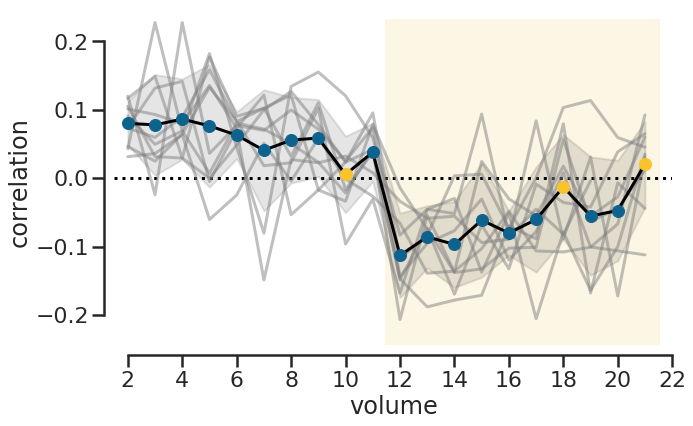

In [246]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
ax = make_single_tr_plot(p_df,ax=ax)
sns.despine()
plt.show()

#### toolbox use

In [247]:
#def make_p(pFolder,pName,clf=clf,my_scaler=my_scaler,my_labeler=my_labeler):
#    
#    filename = os.path.join(pFolder, ''.join([ pName, '_corr_df.csv']))
#    p_df = pd.read_csv(filename, index_col=[0], header=0)
#    p_inv_df = p_df*conds
#    labeled_predictions = make_preds(p_inv_df,clf,my_scaler,my_labeler)
#    
#    fig = plt.figure(figsize=(16,4))
#    with sns.axes_style("ticks"):
#        ax = plt.subplot(111)
#        ax = make_single_plot(p_df,labeled_predictions,ax)
#    sns.despine()
#    out_name200 = os.path.join(pFolder, ''.join([ pName, '_timeAll200trs.png']))
#    plt.savefig(out_name200,dpi=300,bbox_inches='tight')
#    plt.close()
#    
#    fig = plt.figure(figsize=(10,6))
#    with sns.axes_style("ticks"):
#        ax = plt.subplot(111)
#        ax = make_single_tr_plot(p_df,ax)
#    sns.despine()
#    out_name20 = os.path.join(pFolder, ''.join([ pName, '_timeCycle20trs.png']))
#    plt.savefig(out_name20,dpi=300,bbox_inches='tight')
#    
#    plt.close()
#    
#    return out_name200, out_name20

### summary

We see a robust pattern of volume-by-volume correlations with templates, indicating that on the group level, single volumes carry systematic diagnostic information. We also see that usually there is a plausible rank-order of correlations, with left and right at the extremes and bilateral in the middle.



**************

< [Previous](11-mw-logistic-regression.ipynb) | [Contents](00-mw-overview-notebook.ipynb) | [Next >](13-mw-make-group-predictions.ipynb)